In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example 1

Many types of distributions in real life, that are able to simulate different situations. In this monte carlo simulation example 1 you are using multiple approximative simulations to define different parts of a commute. Then essentially simulating it 10,000 times to find where the average lies

<img src="distribution_shapes.png" width="400"/>

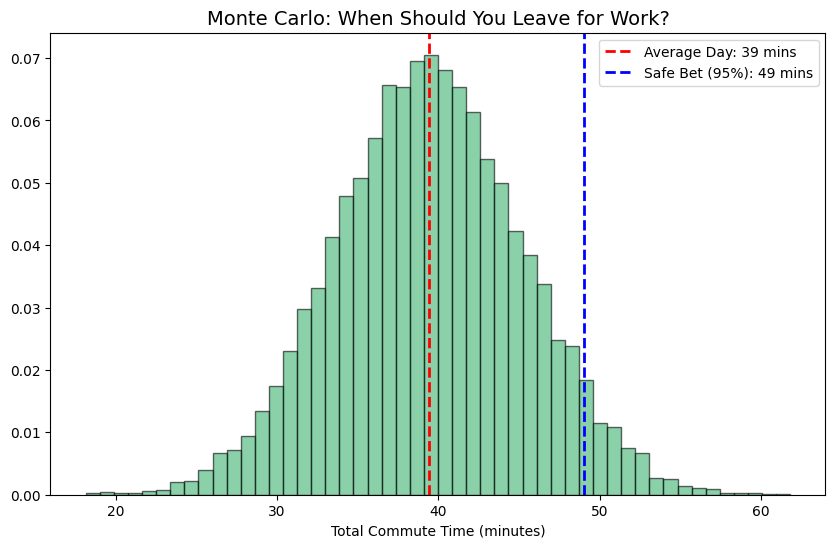

In [ ]:
# We simulate 10,000 mornings
N = 10000

# 1. THE DRIVE (The "Normal" Part)
# Usually 30 mins, but standard deviation is 5 mins (sometimes 20, sometimes 40).
drive_time = np.random.normal(loc=30, scale=5, size=N)

# 2. FINDING PARKING (The "Wild Card")
# Best case: 2 mins. Most likely: 5 mins. Worst case: 15 mins (circled the lot 3 times).
parking_time = np.random.triangular(left=2, mode=5, right=15, size=N)

# 3. THE ELEVATOR (The "Easy" Part)
# Always takes between 1 and 3 minutes.
elevator_time = np.random.uniform(low=1, high=3, size=N)

# --- ADD IT ALL UP ---
total_commute = drive_time + parking_time + elevator_time

# --- ANALYZE ---
# The Average Day
average_day = np.mean(total_commute)

# The "Safe" Day (95th Percentile)
# This is the time that covers 95% of all possible mornings.
safe_bet = np.percentile(total_commute, 95)

# --- PLOT ---
plt.figure(figsize=(10, 6))
plt.hist(total_commute, bins=50, density=True, alpha=0.6, color='mediumseagreen', edgecolor='black')
plt.axvline(average_day, color='red', linestyle='dashed', linewidth=2, label=f'Average Day: {average_day:.0f} mins')
plt.axvline(safe_bet, color='blue', linestyle='dashed', linewidth=2, label=f'Safe Bet (95%): {safe_bet:.0f} mins')
plt.title('Monte Carlo: When Should You Leave for Work?', fontsize=14)
plt.xlabel('Total Commute Time (minutes)')
plt.legend()
plt.savefig('commute_simulation.png')
plt.show()

# Example 2
In this second example, you predict stock prices using the same method but the approximation is 'Geometric Brownian Motion'

In [12]:
# Setup: 1 year, 252 trading days, 1000 simulations
days = 252
simulations = 1000
start_price = 100

# Assumptions: 10% expected return, 20% volatility
mu = 0.10 / days
sigma = 0.20 / np.sqrt(days)


In [ ]:
shocks = np.random.normal(mu, sigma, (days, simulations))
price_paths = start_price * np.cumprod(np.exp(shocks), axis=0)

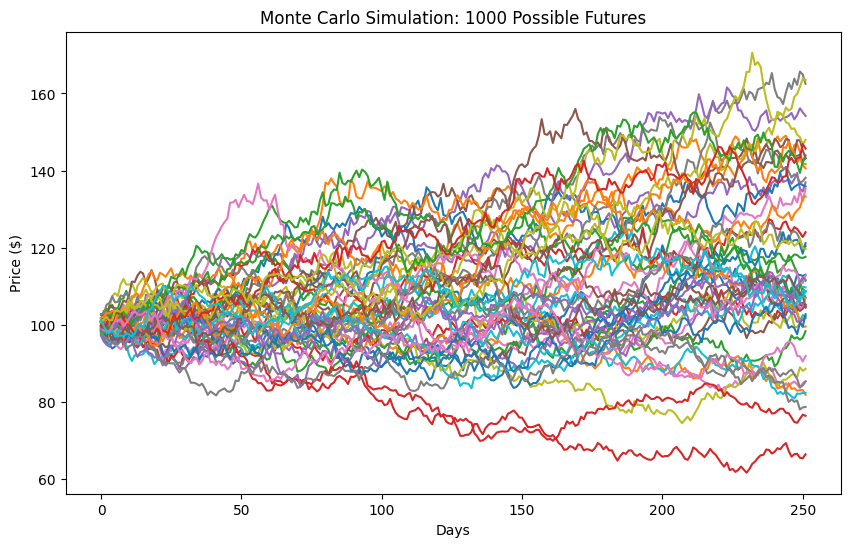

In [11]:
plt.figure(figsize=(10,6))
plt.plot(price_paths[:, :50]) # Plot first 50 paths to keep it clean
plt.title(f'Monte Carlo Simulation: {simulations} Possible Futures')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.show()

## Understanding Geometric Brownian Motion

#### Understanding Shocks
$$shocks = np.random.normal()$$

Is creating a matrix of daily percentage moves. Let's look at a tiny version. Instead of 252 days and 1000 simulations, imagine 3 Days and 2 Simulations. The computer reaches into the "Normal Distribution" hat and pulls out random numbers centered around 0.0005.
* Daily Drift (Mean): 0.05% (0.0005) - The tiny average growth.
* Daily Volatility (Sigma): 1% (0.01) - The daily noise.

| Day | Simulation 1 (The "Bull" Case) | Simulation 2 (The "Bear" Case) |
| :--- | :--- | :--- |
| **1** | +0.012 (Up 1.2%) | -0.008 (Down 0.8%) |
| **2** | +0.005 (Up 0.5%) | -0.015 (Down 1.5%) |
| **3** | +0.002 (Up 0.2%) | +0.001 (Up 0.1%) |


####  "Normal Consecutive" vs. "Geometric"
You may ask: "How is this different from just running a bunch of normal consecutive distributions?"

The difference isn't in the grid; it is in how we add them up.
* Option A: Arithmetic Brownian Motion (The "Additive" Way)
    * This is what you might naturally do in basic statistics: Just add the numbers.
    $$Price_{Today} = Price_{Yesterday} + \text{Shock}$$
    * Start: $100
    * Day 1 (Shock +1.2): $100 + 1.2 = $101.20
    * Day 2 (Shock +0.5): $101.20 + 0.5 = $101.70

The Problem: This assumes a "fixed dollar amount" change.
* If the stock is $100, a +1.2 shock adds $1.20.
* If the stock grows to $1,000,000, a +1.2 shock still only adds $1.20.
* In reality, a $1M stock should move by $10,000 (1%), not $*1.

* Option B: Geometric Brownian Motion

